
**ML algotithm **
---

---


---

---



# LOGISTIC REGRESSION


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df[df['bmi'].isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [9]:
df=df[~df['bmi'].isna()]

In [14]:
df[df['hypertension'].isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [15]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [17]:
df['age'].unique()

array([6.70e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01, 7.40e+01,
       6.90e+01, 7.80e+01, 6.10e+01, 5.40e+01, 5.00e+01, 6.40e+01,
       7.50e+01, 6.00e+01, 7.10e+01, 5.20e+01, 8.20e+01, 6.50e+01,
       5.70e+01, 4.20e+01, 4.80e+01, 7.20e+01, 5.80e+01, 7.60e+01,
       3.90e+01, 7.70e+01, 6.30e+01, 7.30e+01, 5.60e+01, 4.50e+01,
       7.00e+01, 5.90e+01, 6.60e+01, 4.30e+01, 6.80e+01, 4.70e+01,
       5.30e+01, 3.80e+01, 5.50e+01, 4.60e+01, 3.20e+01, 5.10e+01,
       1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01, 3.50e+01,
       2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01, 1.70e+01,
       1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01, 2.90e+01,
       1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01, 3.60e+01,
       6.40e-01, 3.40e+01, 4.10e+01, 8.80e-01, 5.00e+00, 2.60e+01,
       3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00, 9.00e+00,
       1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01, 1.08e+00,
       1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e+00, 1.72e

In [18]:
df['age']=df['age'].astype(int)

In [19]:
df['age'].unique()

array([67, 80, 49, 79, 81, 74, 69, 78, 61, 54, 50, 64, 75, 60, 71, 52, 82,
       65, 57, 42, 48, 72, 58, 76, 39, 77, 63, 73, 56, 45, 70, 59, 66, 43,
       68, 47, 53, 38, 55, 46, 32, 51, 14,  3,  8, 37, 40, 35, 20, 44, 25,
       27, 23, 17, 13,  4, 16, 22, 30, 29, 11, 21, 18, 33, 24, 36,  0, 34,
       41,  5, 26, 31,  7, 12, 62,  2,  9, 15, 28, 10,  1, 19,  6])

In [20]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df['avg_glucose_level'].unique()

array([228.69, 105.92, 171.23, ...,  82.99, 166.29,  85.28])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int64  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 498.6+ KB


In [6]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
print("\nLabel Encoded Data:")
print(df)
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['work_type']=label_encoder.fit_transform(df['work_type'])

print("\nLabel Encoded Data:")
print(df)


Label Encoded Data:
      gender  age  hypertension  heart_disease  ever_married  work_type  \
0       Male   67             0              1             1          2   
2       Male   80             0              1             1          2   
3     Female   49             0              0             1          2   
4     Female   79             1              0             1          3   
5       Male   81             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
5104  Female   13             0              0             0          4   
5106  Female   81             0              0             1          3   
5107  Female   35             0              0             1          3   
5108    Male   51             0              0             1          2   
5109  Female   44             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0     

In [23]:
df['gender']=label_encoder.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
5,1,81,0,0,1,2,1,186.21,29.0,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   int64  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 460.2 KB


In [25]:
# Print the number of records with and without STROKE.
print("Number of records in each label are")
print(df['stroke'].value_counts())
# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df['stroke'].value_counts() * 100 / df.shape[0], "\n")

Number of records in each label are
0    4700
1     209
Name: stroke, dtype: int64

Percentage of records in each label are
0    95.742514
1     4.257486
Name: stroke, dtype: float64 



In [ ]:
print(df.shape)
df.columns

(4909, 11)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'Ever_married',
       'Smoking_status'],
      dtype='object')

In [ ]:
df.info()

In [ ]:
df1=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Print the number of records with and without STROKE.
print("Number of records in each label are")
print(df1['stroke'].value_counts())
# Print the percentage of each label
print("\nPercentage of records in each label are")
print(df1['stroke'].value_counts() * 100 / df1.shape[0], "\n")

Number of records in each label are
0    4861
1     249
Name: stroke, dtype: int64

Percentage of records in each label are
0    95.127202
1     4.872798
Name: stroke, dtype: float64 



In [36]:
def sigmoid(x):
    return pd.Series(1 / ( 1 + np.exp(-x)))

In [37]:
df['avg_glucose_level'].describe()

count    4909.000000
mean      105.305150
std        44.424341
min        55.120000
25%        77.070000
50%        91.680000
75%       113.570000
max       271.740000
Name: avg_glucose_level, dtype: float64

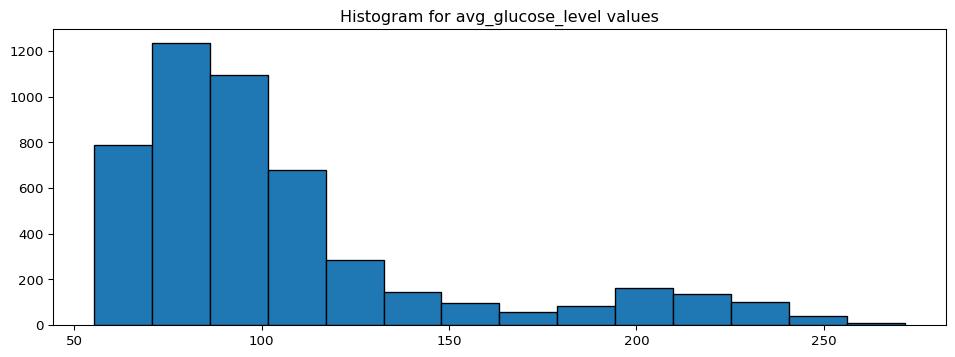

In [38]:
plt.figure(figsize = (12,4), dpi = 96)
plt.title("Histogram for avg_glucose_level values")
plt.hist(df['avg_glucose_level'], bins = 'sturges', edgecolor = 'black')
plt. show()

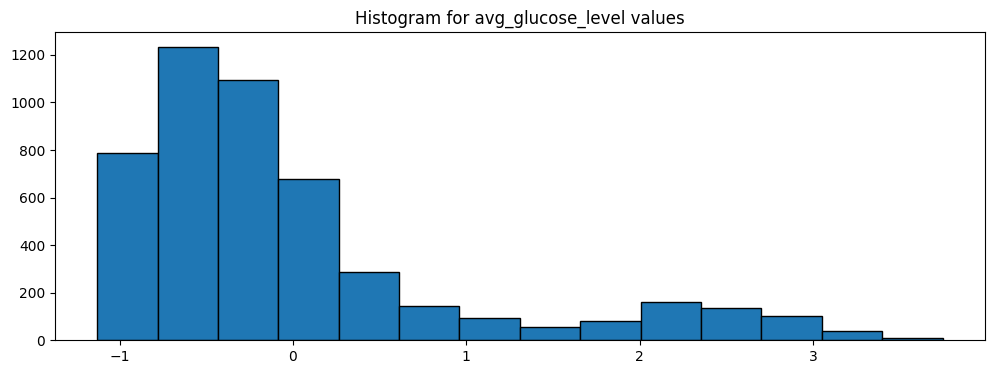

In [ ]:
def standard_scalar(series):
    new_series = (series - series.mean()) / series.std()
    return new_series
scaled_glc = standard_scalar(df['avg_glucose_level'])

plt.figure(figsize = (12,4))
plt.title("Histogram for avg_glucose_level values")
plt.hist(scaled_glc, bins = 'sturges', edgecolor = 'black')
plt.show()

In [ ]:
glc_sig_output = sigmoid(df['avg_glucose_level'])
glc_sig_output.describe()

count    4909.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: avg_glucose_level, dtype: float64

In [ ]:
scaled_glc_sig_output = sigmoid(scaled_glc)
scaled_glc_sig_output.describe()

count    4909.000000
mean        0.481122
std         0.191672
min         0.244221
25%         0.346247
50%         0.423919
75%         0.546377
max         0.976943
Name: avg_glucose_level, dtype: float64

In [ ]:
def predict(sig_output, threshold):
    y_pred = [ 1 if output >= threshold else 0 for output in sig_output]
    return pd.Series(y_pred)

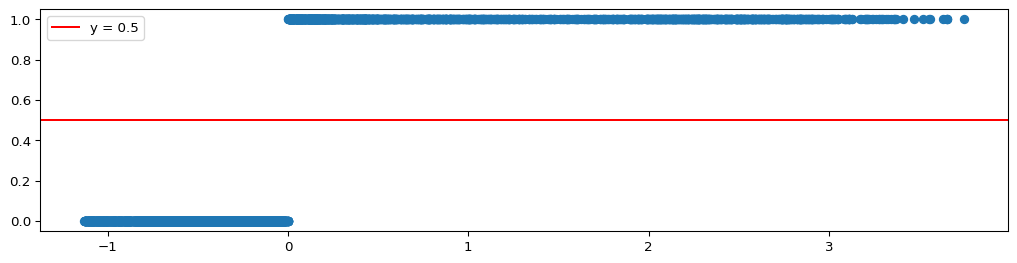

In [ ]:
threshold = 0.5
heart_disease_pred = predict(scaled_glc_sig_output, threshold)

plt.figure(figsize=(13,3), dpi = 96)
plt.scatter(scaled_glc, heart_disease_pred)
plt.axhline(y = threshold, label = f'y = { threshold }', color = 'r')
plt. legend()
plt.show()

In [ ]:
print(f"Threshold value: {threshold}")
print(f"\nPredicted value counts:\n{heart_disease_pred.value_counts()}")
print(f"\nActual value counts:\n{df['stroke']. value_counts()}")


Threshold value: 0.5

Predicted value counts:
0    3315
1    1594
dtype: int64

Actual value counts:
0    4700
1     209
Name: stroke, dtype: int64


***OVER SAMPLING USING SMOTE.***

---


Synthetic Minority Over-sampling TEchnique (SMOTE)

In [28]:
import imblearn
from imblearn.over_sampling import SMOTE

In [29]:
X = df.drop(columns = 'stroke')
y = df['stroke']
sm = SMOTE(random_state=42, k_neighbors=5)

In [30]:
X_res, y_res = sm.fit_resample(X, y)

In [31]:
#Split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)


In [32]:
#Create a multivariate logistic regression model. Also, predict the target values for the train set.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_clf_1 = LogisticRegression()
log_clf_1.fit(X_train, y_train)
print(log_clf_1.score(X_train, y_train))

#Predict the target values for the train set.
y_train_pred = log_clf_1.predict(X_train)

print("\n Confusion Matrix \n")
print(confusion_matrix(y_train, y_train_pred))

print("\n Classification Report\n")
print(classification_report(y_train, y_train_pred))

0.8024316109422492

 Confusion Matrix 

[[2569  724]
 [ 576 2711]]

 Classification Report

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3293
           1       0.79      0.82      0.81      3287

    accuracy                           0.80      6580
   macro avg       0.80      0.80      0.80      6580
weighted avg       0.80      0.80      0.80      6580

